In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
from matplotlib import pyplot as plt

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [2]:
%store -r samples_data
%store -r threshold
%store -r cluster_2nd

cluster = cluster_2nd

In [3]:
# 对于每个类别进行判别
samples_features = cluster.iloc[:, 2:]
datetime_features = cluster[("时间", 'Unnamed: 1_level_1')]  # 时间性质
source_features = samples_features[samples_features.columns[[x for x in range(0, 7)]]]  # 原料性质
produc_features = samples_features[samples_features.columns[[x for x in range(7, 10)]]]  # 产品性质
manule_features = samples_features[samples_features.columns[[x for x in range(14, samples_features.shape[1])]]]  # 操作属性

In [4]:
# 进行数据的标准化操作
scaler = preprocessing.StandardScaler()
scaler.fit(manule_features.to_numpy())
manule_features[manule_features.keys()] = scaler.transform(manule_features)

print(manule_features.reindex().shape)

scaler.fit(produc_features.to_numpy())
produc_features[produc_features.keys()] = scaler.transform(produc_features)

print(produc_features.reindex().shape)

scaler.fit(source_features.to_numpy())
source_features[source_features.keys()] = scaler.transform(source_features)

print(source_features.reindex().shape)

(117, 335)
(117, 3)
(117, 7)


<AxesSubplot:xlabel='None-None', ylabel='None-None'>

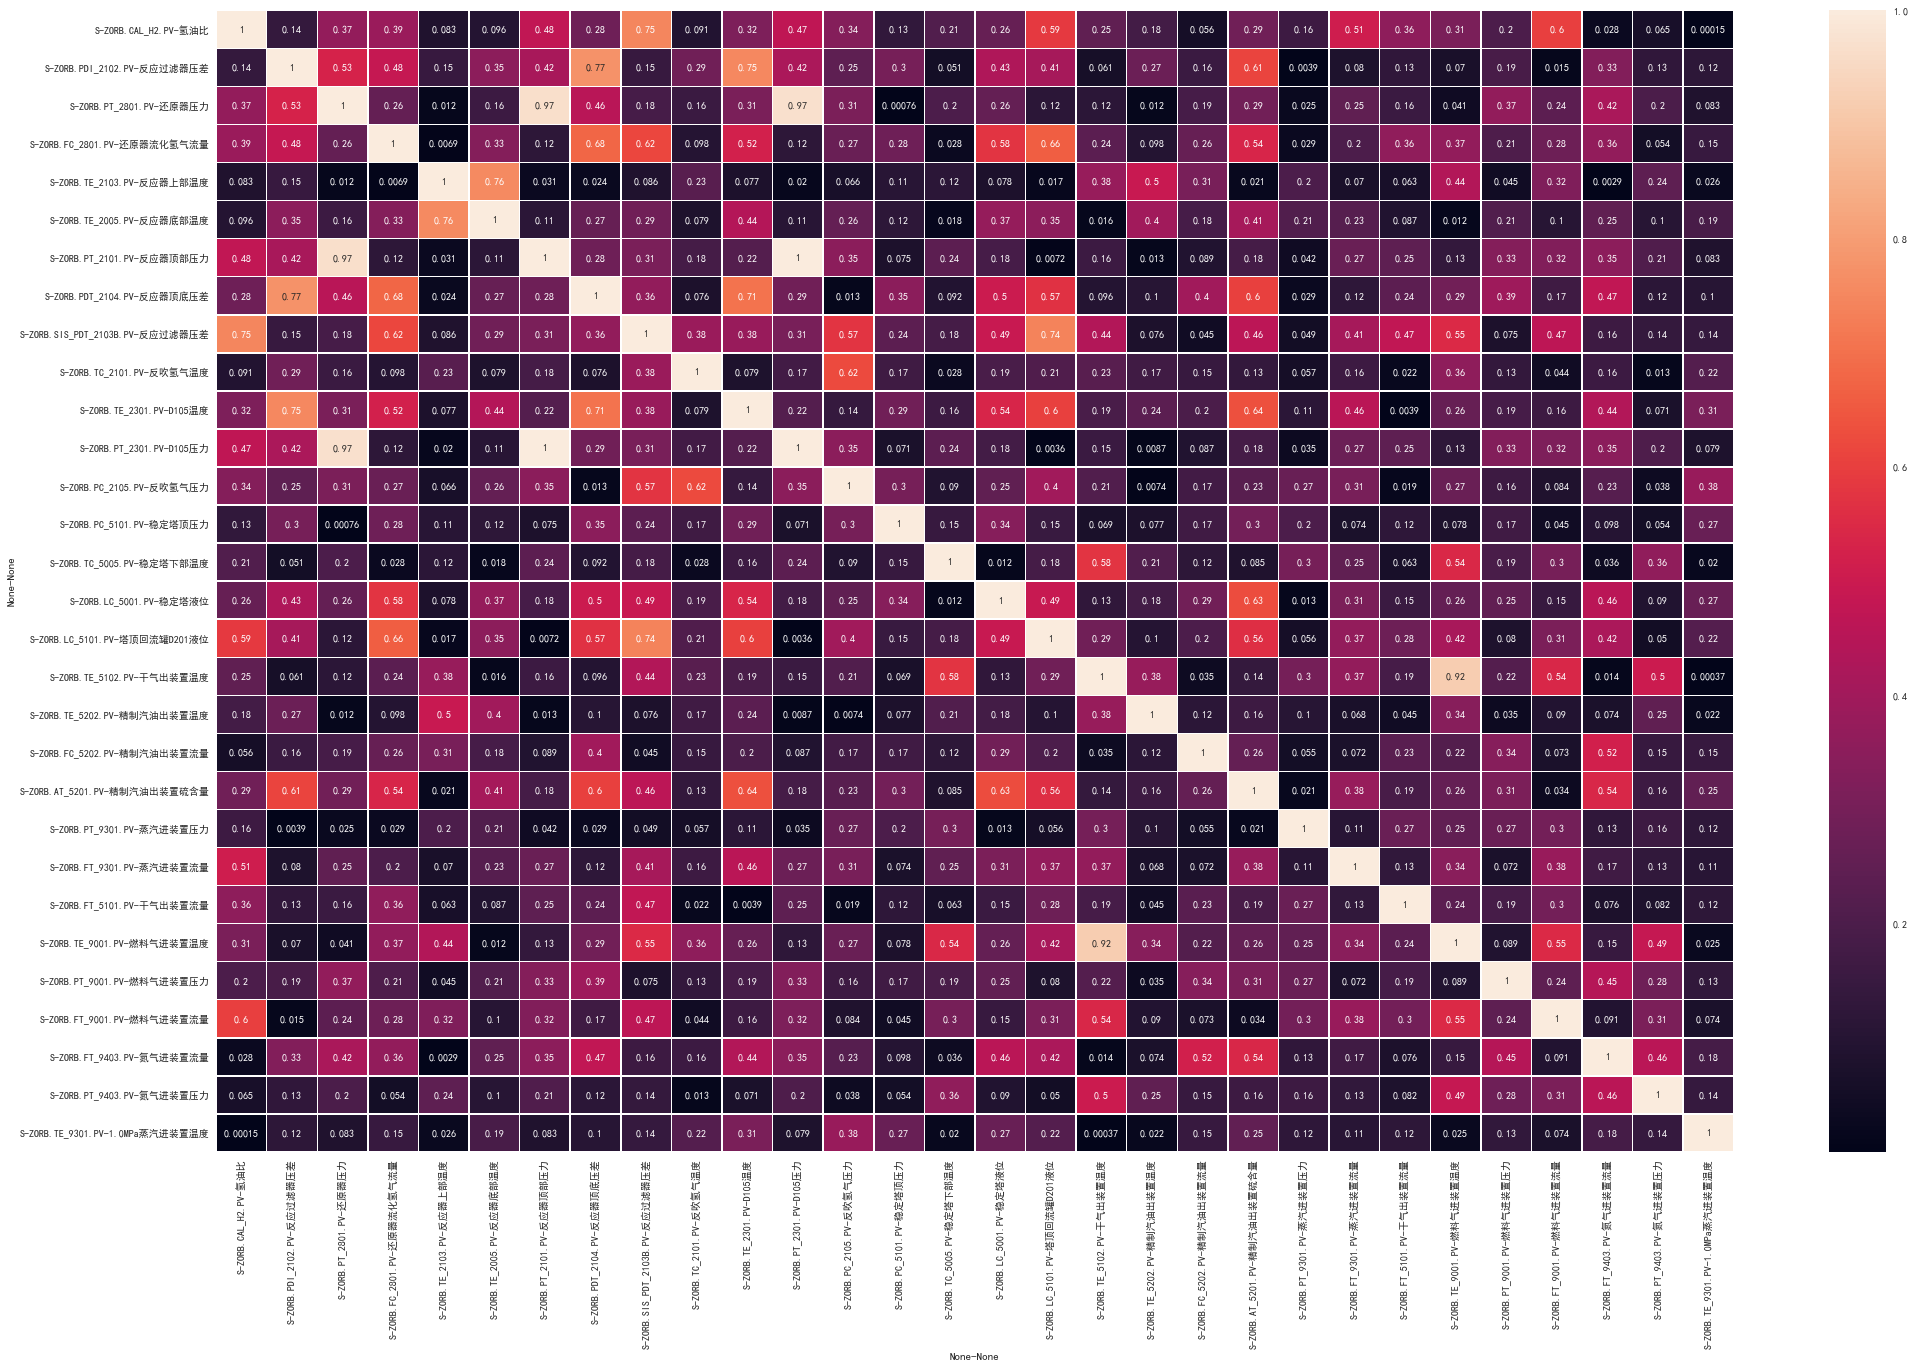

In [5]:
# 计算 操作变量 间的 相关系数 矩阵进行特征选择
manule_features_corr = manule_features.corr(method='spearman').abs()
# 展示 属性间 相关关系 热力图
fig, ax = plt.subplots(figsize=(34, 21))
sns.heatmap(manule_features_corr.iloc[:30, :30], annot=True, linewidths=.5, ax=ax)  # 只取出前 30 个属性作为一个例子

In [6]:
# Upper triangle of correlations
upper = manule_features_corr.where(np.triu(np.ones(manule_features_corr.shape), k=1).astype(np.bool))
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 179 columns to remove.


In [7]:
manule_features = manule_features.drop(columns = to_drop)
manule_features.head()

,S-ZORB.CAL_H2.PV,S-ZORB.PDI_2102.PV,S-ZORB.PT_2801.PV,S-ZORB.FC_2801.PV,S-ZORB.TE_2103.PV,S-ZORB.TE_2005.PV,S-ZORB.PDT_2104.PV,S-ZORB.SIS_PDT_2103B.PV,S-ZORB.TC_2101.PV,S-ZORB.TE_2301.PV,...,S-ZORB.AT-0008.DACA.PV,S-ZORB.AT-0010.DACA.PV,S-ZORB.AT-0011.DACA.PV,S-ZORB.AT-0012.DACA.PV,S-ZORB.AT-0013.DACA.PV,S-ZORB.FT_1204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1504.DACA.PV,cluster
,氢油比,反应过滤器压差,还原器压力,还原器流化氢气流量,反应器上部温度,反应器底部温度,反应器顶底压差,反应过滤器压差,反吹氢气温度,D105温度,...,S_ZORB AT-0008,S_ZORB AT-0010,S_ZORB AT-0011,S_ZORB AT-0012,S_ZORB AT-0013,D-121含硫污水排量,加氢裂化轻石脑油进装置累积流量,8.0MPa氢气至循环氢压缩机入口,8.0MPa氢气至反吹氢压缩机出口,
302,-1.437665,-1.008082,-0.716023,2.914424,-1.090826,-0.237609,-1.177852,2.711145,0.738958,-0.698642,...,1.954933,0.118668,1.905158,-1.347016,-0.528935,-0.912889,0.883624,-0.154887,0.025605,0.0
291,0.249261,-1.333541,-0.928776,2.898531,-2.551316,-1.565445,-1.227667,2.561223,0.817298,-0.794228,...,2.017857,5.503274,2.030676,-1.283056,-0.484983,-0.746140,1.010270,-0.643312,0.828936,0.0
290,-0.016816,-0.943685,-0.949471,2.868920,0.719096,1.822583,-1.463284,2.542332,0.735502,-0.438160,...,1.924298,1.785446,1.919534,0.412674,-0.481647,-1.123873,1.026615,-1.248209,0.831862,0.0
289,-0.446255,-0.572037,-0.999669,2.916439,-0.710659,0.492820,-1.560933,2.529737,0.749009,-0.431593,...,1.996823,3.001298,1.805762,-0.259957,-0.482307,-0.954161,1.037759,-1.116430,0.852069,0.0
288,-0.586539,-0.571740,-1.027448,2.905371,-0.082221,1.297762,-1.584177,2.517143,0.766966,-0.305706,...,2.025099,0.081699,1.905907,0.947374,-0.480504,-1.387085,1.048604,-0.357481,0.355043,0.0


In [8]:
y = produc_features[('产品性质', 'RON损失\n（不是变量）')].to_numpy()
X = manule_features.to_numpy()

In [9]:
# 使用 T-SNE 进行数据降维
# X是特征，不包含target; X_tsne 是已经降维之后的特征
# 指定降维后的维数
tsne = manifold.TSNE(n_components=30, perplexity=10, n_iter=6000, init='pca', method="exact")
X_tsne = tsne.fit_transform(X)
tSNE_features = pd.DataFrame(data=X_tsne, columns=[f'feature_{x + 1}' for x in range(30)])

In [10]:
# 新特征属性 与 原属性 的 相关系数的阈值
threshold_2 = 0.7

# 根据 新特征属性 与 辛烷值RON损失 的相关系数，筛选 相关系数 小于等于设定阈值的 新特征属性 作为构建函数目标属性
relate_features = set()
for _ in tSNE_features.keys():
    for __ in manule_features.keys():
        feature_corr = manule_features[__].corr(tSNE_features[_], method="spearman")
        if np.abs(feature_corr) >= threshold_2:
            relate_features.add(__)
print(relate_features)

{('S-ZORB.PDT_2906.DACA', 'ME-108过滤器差压'), ('S-ZORB.FT_1004.PV', '3#催化汽油进装置流量'), ('S-ZORB.PDI_2903.DACA', 'ME-103进出口差压'), ('S-ZORB.AT-0012.DACA.PV', 'S_ZORB AT-0012'), ('S-ZORB.FT_1504.DACA.PV', '8.0MPa氢气至反吹氢压缩机出口'), ('S-ZORB.PT_7510B.DACA', 'K-103B排气压力'), ('S-ZORB.BS_AT_2401.PV', '闭锁料斗烃含量'), ('S-ZORB.SIS_TE_6010.PV', '加热炉排烟出口温度'), ('S-ZORB.PT_7107B.DACA', 'K-101B排气压力'), ('S-ZORB.TE_7504.DACA', 'K-102A排气温度'), ('S-ZORB.FT_1006.TOTALIZERA.PV', '加氢裂化轻石脑油进装置累积流量'), ('S-ZORB.FC_5202.PV', '精制汽油出装置流量'), ('S-ZORB.FT_9302.PV', '0.3MPa凝结水出装置流量'), ('S-ZORB.FT_2302.DACA', 'D-105上跨接线松动风流量'), ('S-ZORB.TE_9002.DACA', 'D-203顶部出口管温度'), ('S-ZORB.PDT_2104.PV', '反应器顶底压差')}


In [11]:
# 增加题目要求的变量作为建模属性
model_features = manule_features[list(relate_features)].join(source_features[[('原料性质', '辛烷值RON'), ('原料性质', '硫含量,μg/g')]])
model_features = model_features.join(datetime_features)
model_features.head()

,S-ZORB.PDT_2906.DACA,S-ZORB.FT_1004.PV,S-ZORB.PDI_2903.DACA,S-ZORB.AT-0012.DACA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.PT_7510B.DACA,S-ZORB.BS_AT_2401.PV,S-ZORB.SIS_TE_6010.PV,S-ZORB.PT_7107B.DACA,S-ZORB.TE_7504.DACA,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FC_5202.PV,S-ZORB.FT_9302.PV,S-ZORB.FT_2302.DACA,S-ZORB.TE_9002.DACA,S-ZORB.PDT_2104.PV,原料性质,时间
,ME-108过滤器差压,3#催化汽油进装置流量,ME-103进出口差压,S_ZORB AT-0012,8.0MPa氢气至反吹氢压缩机出口,K-103B排气压力,闭锁料斗烃含量,加热炉排烟出口温度,K-101B排气压力,K-102A排气温度,加氢裂化轻石脑油进装置累积流量,精制汽油出装置流量,0.3MPa凝结水出装置流量,D-105上跨接线松动风流量,D-203顶部出口管温度,反应器顶底压差,辛烷值RON,Unnamed: 1_level_1
302,-0.445144,0.595187,1.593688,-1.347016,0.025605,-0.329904,0.225508,-0.514636,0.490353,0.121816,0.883624,1.606282,-0.828226,-0.145123,1.407452,-1.177852,1.538911,2017-06-06 12:36:04
291,0.073317,-2.924015,1.525046,-1.283056,0.828936,-0.328715,0.389010,-0.673447,0.506536,0.121816,1.010270,0.762311,-1.233332,-0.331054,0.757758,-1.227667,-0.461673,2017-06-30 08:00:00
290,0.020085,-2.929170,2.035974,0.412674,0.831862,-0.328122,0.779403,-0.209301,0.507433,0.121816,1.026615,0.778308,-0.830512,-0.315216,1.401998,-1.463284,0.126734,2017-07-03 08:00:00
289,-0.015403,-2.925071,1.844095,-0.259957,0.852069,-0.327222,0.882837,-0.119229,0.510304,0.121816,1.037759,0.764027,-0.873408,-0.295519,1.316219,-1.560933,0.009052,2017-07-05 08:00:00
288,-0.050890,-2.926979,1.134681,0.947374,0.355043,-0.235142,0.787034,0.035344,0.507059,0.121816,1.048604,0.642357,-0.785302,-0.298634,1.455596,-1.584177,0.009052,2017-07-07 08:00:00


In [12]:
weight_2nd = manule_features.shape[0]/samples_features.shape[0]
model_features_2nd = model_features
produc_features_2nd = produc_features
%store model_features_2nd
%store produc_features_2nd
%store weight_2nd

Stored 'model_features_2nd' (DataFrame)
Stored 'produc_features_2nd' (DataFrame)
Stored 'weight_2nd' (float)
